In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
alpha = 1.0
r0 = 1.0
k = 1.0

def get_exact_values(x,r,alpha=1.0,r0=1.0,k=1.0):
    denom = r0 + k * x
    down_stream = alpha * np.power((r0/denom), 2)
    fx = -np.power(r/(denom), 2)
    radial_effect = np.exp(fx)
    
    #return down_stream * radial_effect
    return radial_effect

def get_appr_values(x,r,alpha=1.0,r0=1.0,k=1.0,degree=5):
    denom = r0 + k * x
    down_stream = alpha * np.power((r0/denom), 2)
    
    fx = -np.power(r/(denom), 2)
    radial_effect = np.ones_like(fx)
    fact = 1
    for i in range(1, degree+1):
        fact = fact * i
        radial_effect += np.power(fx,i) / fact
    #return down_stream * radial_effect
    return radial_effect

In [15]:
alpha = 1.0
r0 = 1.0
k = 1.0
degree = 5

x = np.linspace(start=0.0, stop=1.5, num=20)
r = np.linspace(start=0.0, stop=1.5, num=20)
x,r = np.meshgrid(x, r)

In [16]:
y = get_exact_values(x,r,alpha,r0,k)
y_aprx = get_appr_values(x,r,alpha,r0,k,degree)

<IPython.core.display.Javascript object>


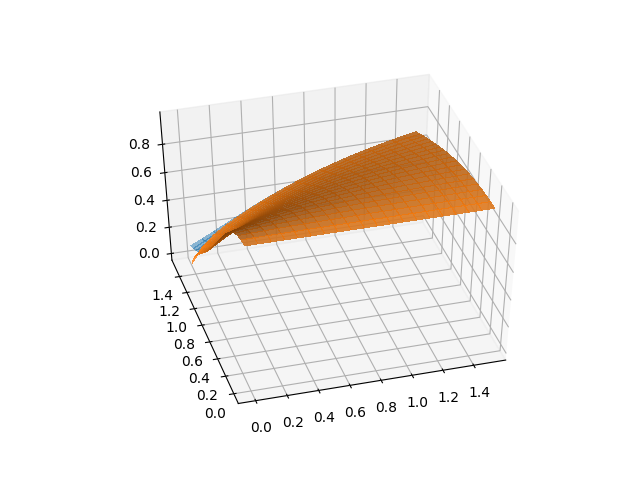

In [17]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib notebook

fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(x, r, y, linewidth=0, antialiased=False, alpha=0.5)
surf2 = ax.plot_surface(x, r, y_aprx, linewidth=0, antialiased=False, alpha=0.8)

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(x, y)
plt.scatter(x, y_aprx)

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(x, np.log(y))
plt.scatter(x, np.log(y_aprx))